### ROC 커브

In [4]:
from sklearn.datasets import make_classification
from sklearn.metrics import *
X, y = make_classification(n_samples=10000, weights=[0.9, 0.1], random_state=1)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0026, C=10, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

In [6]:
print(confusion_matrix(y, y_hat1)) # logistic regression 모델 성능

[[8853   94]
 [ 397  656]]


In [7]:
print(confusion_matrix(y, y_hat2)) # SVC 모델 성능

[[8894   53]
 [ 397  656]]


In [8]:
print(classification_report(y, model1.predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8947
          1       0.87      0.62      0.73      1053

avg / total       0.95      0.95      0.95     10000



In [9]:
print(classification_report(y, model2.predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      8947
          1       0.93      0.62      0.74      1053

avg / total       0.95      0.95      0.95     10000



둘의 성능지표 값은 거의 동일하다.

In [10]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

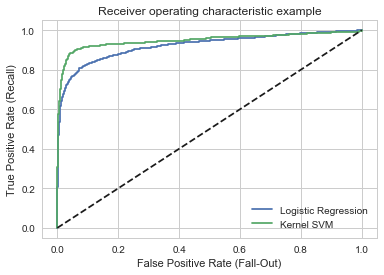

In [11]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

- 근데 ROC 커브를 그리면 두 모델이 다르게 나온다.
- 전체적인 성능은 초록색(Kernel SVM)이 좋다.

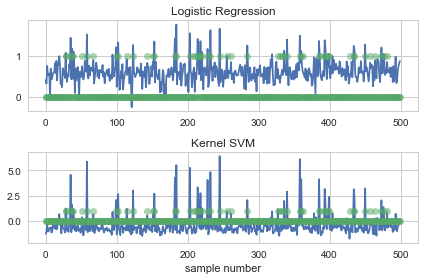

In [12]:
N = 500

plt.subplot(211)
plt.plot(model1.decision_function(X[:N]) * 0.1 + 1)
plt.plot(y[:N], 'o', alpha=0.5)
plt.title("Logistic Regression")

plt.subplot(212)
plt.plot(model2.decision_function(X[:N]) + 1)
plt.plot(y[:N], 'o', alpha=0.5)
plt.title("Kernel SVM")
plt.xlabel("sample number")

plt.tight_layout()
plt.show()

Kernel SVM는 threshhold가 위에서 아래로 왔다갔다해도 값이 0에서 1로 바뀔일이 Logistic보다 적다.

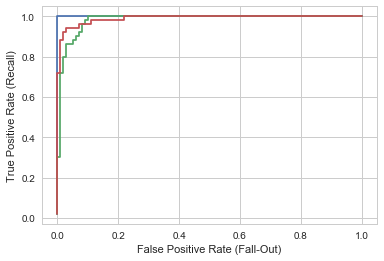

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

In [3]:
model.predict_proba(X)

array([[  1.00000000e+00,   1.46754248e-23],
       [  1.00000000e+00,   2.26928149e-23],
       [  1.00000000e+00,   2.64313142e-24],
       [  1.00000000e+00,   3.22394092e-23],
       [  1.00000000e+00,   7.68621294e-24],
       [  1.00000000e+00,   2.12591550e-20],
       [  1.00000000e+00,   4.45720768e-23],
       [  1.00000000e+00,   5.54737320e-23],
       [  1.00000000e+00,   5.60838637e-24],
       [  1.00000000e+00,   7.36248954e-24],
       [  1.00000000e+00,   5.82916101e-23],
       [  1.00000000e+00,   1.12351853e-22],
       [  1.00000000e+00,   1.64551038e-24],
       [  1.00000000e+00,   6.50763769e-27],
       [  1.00000000e+00,   6.81824924e-25],
       [  1.00000000e+00,   1.29853745e-22],
       [  1.00000000e+00,   1.21135639e-22],
       [  1.00000000e+00,   1.37019658e-22],
       [  1.00000000e+00,   9.90576504e-21],
       [  1.00000000e+00,   1.45487932e-22],
       [  1.00000000e+00,   2.15933713e-21],
       [  1.00000000e+00,   1.95713564e-21],
       [  

다중 클래스는 OvR로...